<a href="https://colab.research.google.com/github/ciaoCiao100/esame_ia_febbraio/blob/main/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -r requirements.txt

In [46]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sl
from tensorflow import keras
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,plot_confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import sklearn.metrics as metrics
import seaborn as sns




# fa i modo che i numeri siano più leggibili.
np.set_printoptions(precision=3, suppress=True)

train_file_path =  "train.csv"
test_file_path = "test.csv"

train_df = pd.read_csv(train_file_path)

#train_df.dtypes
test_df = pd.read_csv(test_file_path)
#test_df.dtypes


Nan di train 

In [47]:
# Sostituisco ad ogni stringa vuota il valore 'NaN'
train_df.replace("", np.nan, inplace=True)
train_df.replace(" ", np.nan, inplace=True)
train_df.replace("?", np.nan, inplace=True)
train_df.head()

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,Placed,M,66.0,Central,76.0,Central,Commerce,72.0,Comm&Mgmt,Yes,84.0,Mkt&HR,58.95,275000.0
1,Not Placed,M,59.6,Central,51.0,Central,Science,60.0,Others,No,75.0,Mkt&HR,59.08,NaN
2,Placed,M,63.0,Others,62.0,Others,Commerce,68.0,Comm&Mgmt,No,64.0,Mkt&Fin,62.46,250000.0
3,Not Placed,M,67.9,Others,62.0,Others,Science,67.0,Sci&Tech,Yes,58.1,Mkt&Fin,75.71,NaN
4,Placed,M,63.0,Central,60.0,Central,Commerce,57.0,Comm&Mgmt,Yes,78.0,Mkt&Fin,54.55,204000.0


Controllo se ci sono effettivamente valori Nan nel dataset train

In [48]:
train_df.isna().sum()

status             0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            45
dtype: int64

 Nan per il test

In [49]:
# Sostituisco ad ogni stringa vuota il valore 'NaN'
test_df.replace("", np.nan, inplace=True)
test_df.replace(" ", np.nan, inplace=True)
test_df.replace("?", np.nan, inplace=True)
test_df.head()

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,Placed,F,85.0,Others,90.0,Others,Commerce,82.0,Comm&Mgmt,No,92.00,Mkt&Fin,68.03,300000.0
1,Placed,M,63.0,Others,71.4,Others,Commerce,61.4,Comm&Mgmt,No,68.00,Mkt&Fin,66.88,240000.0
2,Placed,M,58.0,Central,62.0,Central,Commerce,64.0,Comm&Mgmt,No,53.88,Mkt&Fin,54.97,260000.0
3,Placed,M,84.2,Central,69.4,Central,Science,65.0,Sci&Tech,Yes,80.00,Mkt&HR,52.72,255000.0
4,Not Placed,M,41.0,Central,42.0,Central,Science,60.0,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,NaN



Ricontrollo se ci sono effettivamente valori Nan nel dataset test



In [50]:

test_df.isna().sum()

status             0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            10
dtype: int64

Si arriva ad un problema : andare ad eliminare con la funzione dropna tutte le righe Nan, potrebbe comportare avere un dataset errato, composto da tutte persone che sono state assunte. Quindi si và ad eliminare la colonna del salario.


eliminazione salary da train

In [51]:
#funzione per eliminare la colonna salary da train 

train_df = train_df.drop(columns=['salary'])


 eliminiazione salary da test

In [52]:
#funzione per eliminare la colonna salary da test

test_df = test_df.drop(columns=['salary'])

eliminazione valori Nan

In [53]:
# Procediamo con l'eliminazione dei dati non validi (NaN)
test_df.dropna(inplace=True)
train_df.dropna(inplace=True)

Analisi dei dati a disposizione nel train

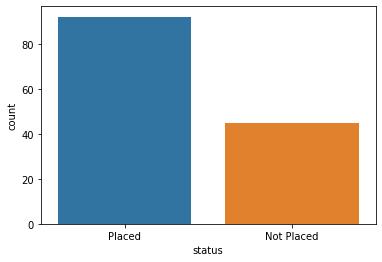

In [54]:
# Diagramma del numero delle persone che sono state assunte 
sns.countplot(x=train_df['status'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

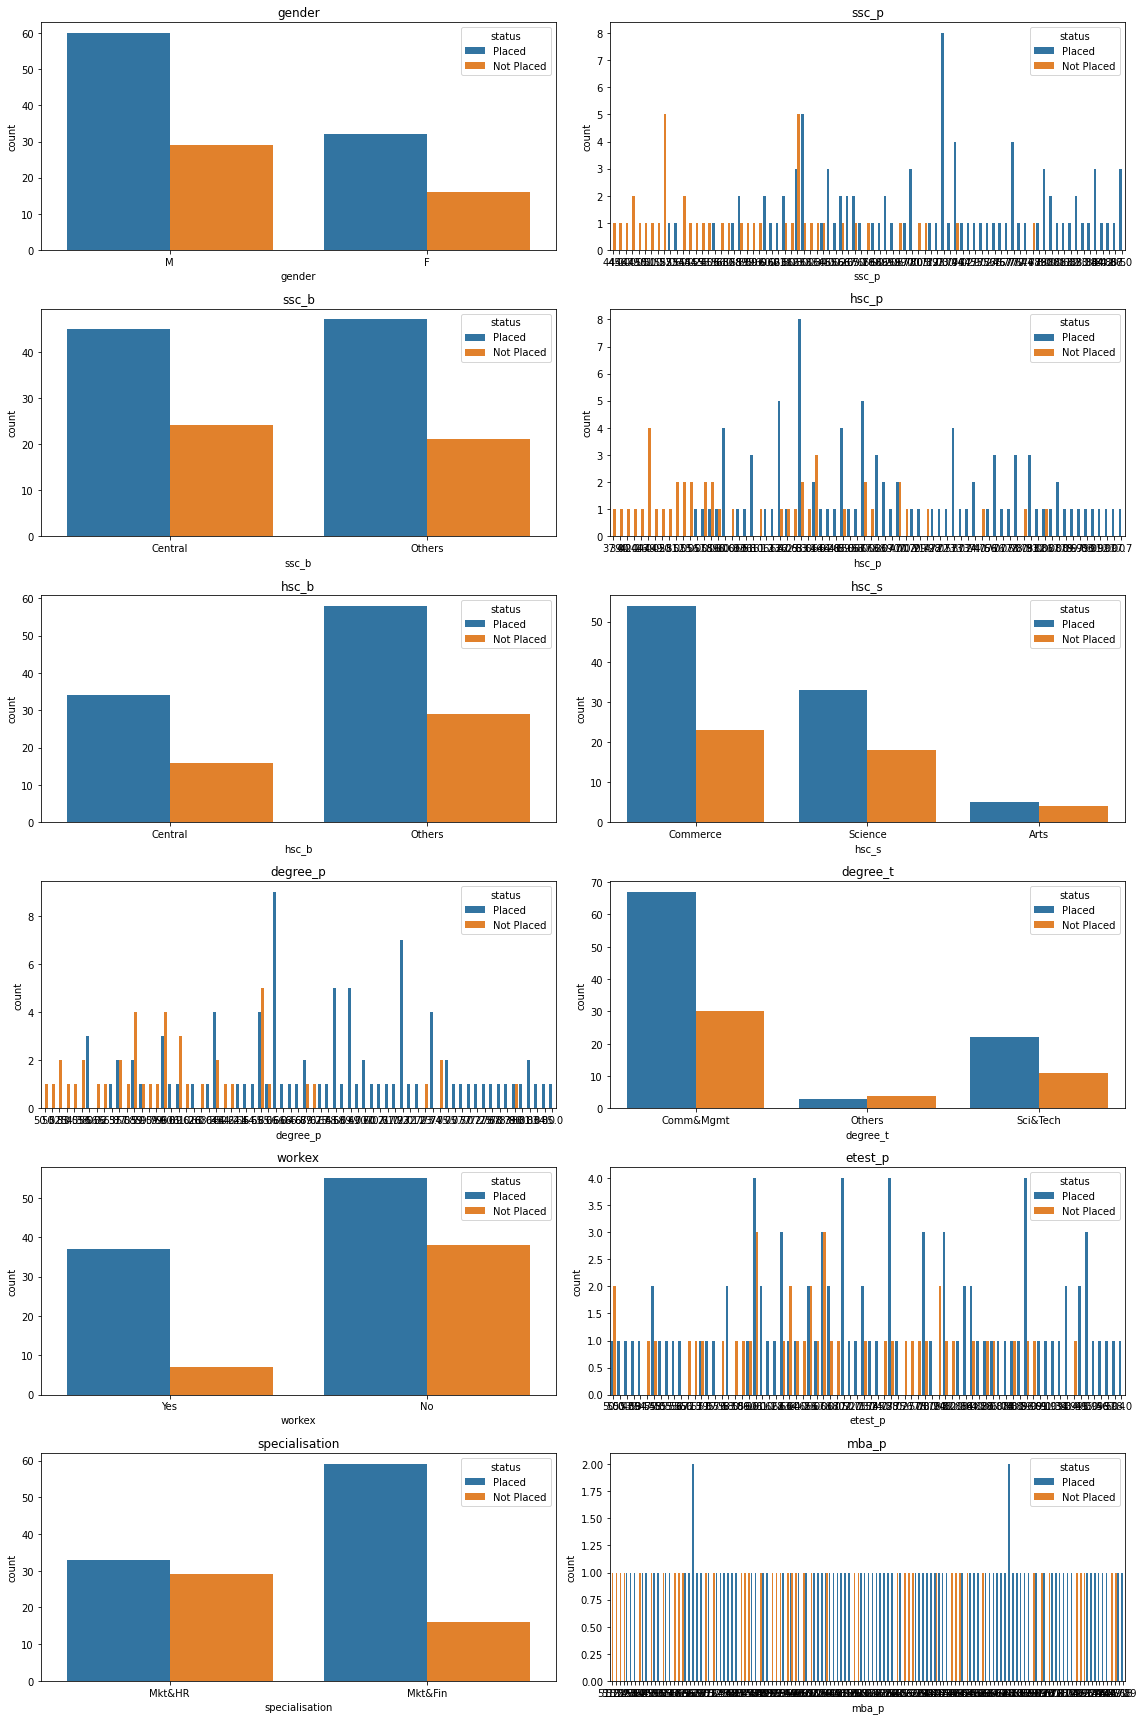

In [55]:
# Alcuni grafici che mettono in relazione le features
# del dataset con le persone che sono state collocate o no 


cols = ['gender','ssc_p','ssc_b','hsc_p','hsc_b','hsc_s','degree_p','degree_t','workex','etest_p','specialisation','mba_p']
n_rows = 6
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*4))
i=0
for r in range(n_rows):
    for c in range(n_cols):
        ax = axs[r][c]
        sns.countplot(train_df[cols[i]], hue=train_df['status'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='status', loc='upper right')
        i+=1
    
plt.tight_layout()



andiamo ad analizzare i seguenti grafici: 

1)gender: vengono collocati circa il 30% delle donne e il 60% degli uomini tuttavia il genere non influisce sul collocamento degli studenti

2)degree_t: vengono collocati circa il 65% delle persone laureatesi in commercio e menagement contro il 25% degli studenti laureati in scienze e tecnologia. Il restante 10% appartiene agli studenti laureati in altre facoltà. Di conseguenza influisce sul collocamento 

3)workex: Possiamo notare come vengano collocate  circa il 60% di   persone con espserienze lavorative contro il 30% di coloro che non hanno esperienza lavorativa

4)specialisation: il 60% individui con specializzazione MKt&F viene collocato,contro il 30% di persone che hanno la specializzaione nell'altra materia

5)ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,mba_p, etest_p: sono feature che illustrano i punteggio di ogni studente ottenuto alle medie(commissione interna/ esterna) , liceo(commissione interna/ esterna) , college e test di collocabilità; si evince che più alto è il punteggio più è possibile che lo studente sia collocato.



Conversione stringhe a float train.csv

In [56]:

for elemento in train_df:
  if   elemento=="ssc_p"	 or elemento=="hsc_p" or elemento=="degree_p"  or elemento=="etest_p"	 or elemento=="mba_p" :
   train_df[elemento] = train_df[elemento].astype('float')
  else:
   train_df[elemento] = (pd.Categorical(train_df[elemento])).codes.astype('float')

# mostro il dataset dopo l'operazione
train_df.head()

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1.0,1.0,66.0,0.0,76.0,0.0,1.0,72.0,0.0,1.0,84.0,1.0,58.95
1,0.0,1.0,59.6,0.0,51.0,0.0,2.0,60.0,1.0,0.0,75.0,1.0,59.08
2,1.0,1.0,63.0,1.0,62.0,1.0,1.0,68.0,0.0,0.0,64.0,0.0,62.46
3,0.0,1.0,67.9,1.0,62.0,1.0,2.0,67.0,2.0,1.0,58.1,0.0,75.71
4,1.0,1.0,63.0,0.0,60.0,0.0,1.0,57.0,0.0,1.0,78.0,0.0,54.55


Conversione stringhe a float test.csv

In [57]:
#tutte le colonne che contengono stringhe devono essere trasformate in colonne che contengono interi 
for elemento in test_df:
  if   elemento=="ssc_p"	 or elemento=="hsc_p" or elemento=="degree_p"  or elemento=="etest_p"	 or elemento=="mba_p" :
   test_df[elemento] = test_df[elemento].astype('float')
  else:
   test_df[elemento] = (pd.Categorical(test_df[elemento])).codes.astype('float')

# mostro il dataset dopo l'operazione
test_df.head()

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1.0,0.0,85.0,1.0,90.0,1.0,1.0,82.0,0.0,0.0,92.00,0.0,68.03
1,1.0,1.0,63.0,1.0,71.4,1.0,1.0,61.4,0.0,0.0,68.00,0.0,66.88
2,1.0,1.0,58.0,0.0,62.0,0.0,1.0,64.0,0.0,0.0,53.88,0.0,54.97
3,1.0,1.0,84.2,0.0,69.4,0.0,2.0,65.0,2.0,1.0,80.00,1.0,52.72
4,0.0,1.0,41.0,0.0,42.0,0.0,2.0,60.0,0.0,0.0,97.00,0.0,53.39


In [58]:


features =['ssc_p','ssc_b','hsc_p','hsc_b','hsc_s','degree_p','degree_t','workex','etest_p','specialisation','mba_p']
X = train_df[features]
Y = train_df['status']
X_test = test_df[features]
Y_test =test_df['status']

# Specify Model : viene utilizzato RandomForestCLaasifier
#La foresta casuale, come suggerisce il nome, 
#è costituita da un gran numero di singoli alberi decisionali che operano come un insieme(differentemente per il DecisionTreeClassifier che opera su un albero di decisione).
#Ogni singolo albero nella foresta casuale genera una previsione di classe basandosi sui suoi attributi ed esprime un voto per quella classe
# e la classe con il maggior numero di voti diventa la previsione del nostro modello
#Mentre alcuni alberi potrebbero essere sbagliati, molti altri alberi avranno ragione, quindi come gruppo gli alberi sono in grado di muoversi nella direzione corretta. 
#Le previsioni (e quindi gli errori) fatte dai singoli alberi devono avere basse correlazioni tra loro.

model = RandomForestClassifier(random_state=1)
model.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

Addestramento

In [59]:
train_predictions = model.predict(X)
train_acc = metrics.accuracy_score(Y,train_predictions)
print('Accuracy train: %s'  % train_acc)

Accuracy train: 1.0


Test

In [60]:
test_predictions = model.predict(X_test)
test_acc=metrics.accuracy_score(Y_test,test_predictions)
print('Accuracy test: %s'  % test_acc)

Accuracy test: 0.9714285714285714


Creazione confusion matrix

In [61]:
conf_matr = confusion_matrix(Y_test, test_predictions, normalize=None)
# Stampa della confusion matrix
print(conf_matr)

[[10  0]
 [ 1 24]]



Plot confusion matrix

[[10  0]
 [ 1 24]]


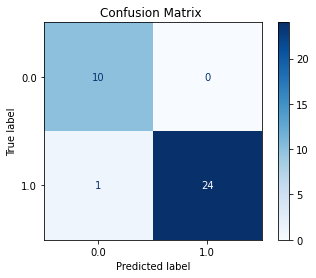

In [62]:
disp = plot_confusion_matrix(model, X_test, Y_test,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix ")



print(disp.confusion_matrix)
plt.show()

I risultati ottenuti sembrano sufficienti a garantire una buona generalizzazione del problema con un train accuracy di 1.0 e un test accuracy di 0.97 . Tuttavia sarebbe utile poter confrontare e confermare i risutati su un dataset più ampio. 